In [1]:
pip install spotipy pandas matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
SPOTIPY_CLIENT_ID = "eed9f557d37f467183e968ac8dfe94e8"
SPOTIPY_CLIENT_SECRET = "fcbeacc9ed534a99bde5ba6290c56c75"

# Set up authentication
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
artist_name = []
track_name = []
popularity = []
track_id = []
images = []

for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2023', type='track', limit=50, offset=i)
    for t in track_results['tracks']['items']:
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])

In [5]:
track_dataframe = pd.DataFrame({
    'Artist': artist_name,
    'Track': track_name,
    'Track ID': track_id,
    'Popularity': popularity,
    'Image URL': images
})

# Sort by popularity (descending)
df_sorted = track_dataframe.sort_values(by='Popularity', ascending=False).reset_index(drop=True)

# Display the first 10 most popular tracks
df_sorted.head(10)

,Artist,Track,Track ID,Popularity,Image URL
0,The Weeknd,"One Of The Girls (with JENNIE, Lily Rose Depp)",7CyPwkp0oE8Ro9Dd5CUDjW,90,https://i.scdn.co/image/ab67616d0000b273b0dd6a...
1,Teddy Swims,Lose Control,17phhZDn6oGtzMe56NuWvj,89,https://i.scdn.co/image/ab67616d0000b2731a0323...
2,Feid,LUNA,7bywjHOc0wSjGGbj04XbVi,87,https://i.scdn.co/image/ab67616d0000b273f1aad8...
3,Don Toliver,No Pole,0eaVIYo2zeOaGJeqZ5TwYz,87,https://i.scdn.co/image/ab67616d0000b273f5e27c...
4,Travis Scott,FE!N (feat. Playboi Carti),42VsgItocQwOQC3XWZ8JNA,86,https://i.scdn.co/image/ab67616d0000b273881d8d...
5,The Kid LAROI,NIGHTS LIKE THIS,1XBYiRV30ykHw5f4wm6qEn,86,https://i.scdn.co/image/ab67616d0000b2732abb30...
6,Chezile,Beanie,5e0b9LgOfi3aJSKXFcOWRe,86,https://i.scdn.co/image/ab67616d0000b273c16d7b...
7,Teddy Swims,The Door,3dj4wgM3cPeuLwMNHDuBon,86,https://i.scdn.co/image/ab67616d0000b2731a0323...
8,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,86,https://i.scdn.co/image/ab67616d0000b27334f21d...
9,Miley Cyrus,Flowers,7DSAEUvxU8FajXtRloy8M0,86,https://i.scdn.co/image/ab67616d0000b273cd2220...


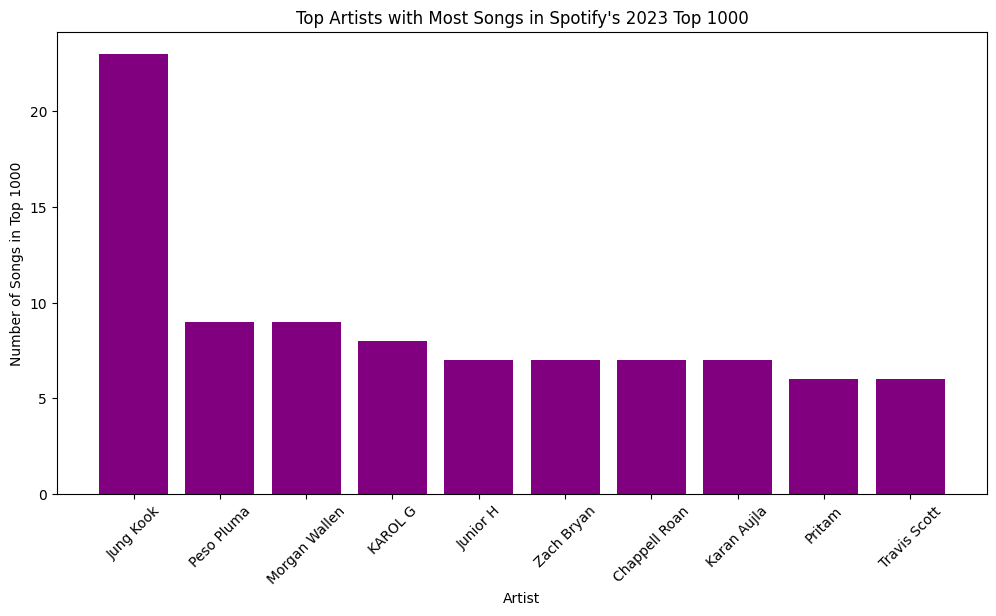

In [11]:
artist_counts = track_dataframe['Artist'].value_counts()
most_successful_artists = artist_counts.head(10)

# Plot the results
plt.figure(figsize=(12,6))
plt.bar(most_successful_artists.index, most_successful_artists.values, color='purple')
plt.xlabel("Artist")
plt.ylabel("Number of Songs in Top 1000")
plt.title("Top Artists with Most Songs in Spotify's 2023 Top 1000")
plt.xticks(rotation=45)
plt.show()

In [13]:
most_popular_track = df_sorted.iloc[0]
most_popular_track_id = most_popular_track['Track ID']

# Get audio features
track_audio_features = sp.audio_features(most_popular_track_id)[0]

# Print key details
print(f"Danceability: {track_audio_features['danceability']}")
print(f"Energy: {track_audio_features['energy']}")
print(f"Speechiness: {track_audio_features['speechiness']}")
print(f"Valence (Mood): {track_audio_features['valence']}")

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7CyPwkp0oE8Ro9Dd5CUDjW with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7CyPwkp0oE8Ro9Dd5CUDjW:
 None, reason: None

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(track_dataframe['Popularity'], track_dataframe['Track'].map(lambda x: sp.audio_features(sp.search(q=x, type='track')['tracks']['items'][0]['id'])[0]['danceability']), c='blue', alpha=0.5)
plt.xlabel("Popularity")
plt.ylabel("Danceability")
plt.title("Danceability vs. Popularity of Spotify Songs (2023)")
plt.show()

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6usohdchdzW9oML7VC4Uhk with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6usohdchdzW9oML7VC4Uhk:
 None, reason: None

<Figure size 800x500 with 0 Axes>